In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tkinter as tk
from tkinter import simpledialog
import matplotlib as mpl

In [3]:
import json
from pandas.io.json import json_normalize
import seaborn as sns
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Arc

from functools import reduce

In [4]:
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

In [5]:
folder_path = '~/Documents/GAA Analytics/2023/'

In [6]:
df = pd.read_excel(folder_path + "Football_Championship_2023_Shots.xlsx")

In [7]:
df

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y
0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634
1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227
2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445
3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422
4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,Dean Rock,26,forward,right,n,42.10,36.790856,64.456948,108.209144,23.543052
1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,Paul Mannion,11,forward,left,y,7.87,5.730524,38.600986,139.269476,49.399014
1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,Dean Rock,26,forward,right,n,31.64,26.844570,60.737940,118.155430,27.262060
1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,Sean O'Shea,11,forward,right,n,17.38,130.320843,53.299923,130.320843,53.299923


### Add Value to scores

In [8]:
df['Score'] = np.where((df['Outcome'] == 'Score'), 1, 0)

### Shot Efficiency

In [9]:
(df['Score'].sum() / len(df)) * 100

58.29858215179316

In [10]:
df['Perc'] = df.groupby('PlayerName')['Score'].transform(lambda x: sum(x) / len(x) * 100)

In [11]:
df

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Perc
0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,33.333333
1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,80.000000
2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,33.333333
3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,100.000000
4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,627,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,short,Miss,Dean Rock,26,forward,right,n,42.10,36.790856,64.456948,108.209144,23.543052,0,52.941176
1195,628,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,point,Score,Paul Mannion,11,forward,left,y,7.87,5.730524,38.600986,139.269476,49.399014,1,56.521739
1196,630,2023-07-30,All Ireland Final,Dublin,Kerry,2nd,70,free,Score,Dean Rock,26,forward,right,n,31.64,26.844570,60.737940,118.155430,27.262060,1,52.941176
1197,625,2023-07-30,All Ireland Final,Kerry,Dublin,2nd,70,free,Score,Sean O'Shea,11,forward,right,n,17.38,130.320843,53.299923,130.320843,53.299923,1,75.757576


### Player Efficiency

In [12]:
eff = df.groupby(['PlayerName', 'Perc']).count()

In [13]:
eff = eff.reset_index()

In [14]:
eff = eff[['PlayerName', 'Perc', 'Score']]

In [15]:
eff = eff.sort_values(by='Score', ascending=False)

In [16]:
eff = eff.head(15)

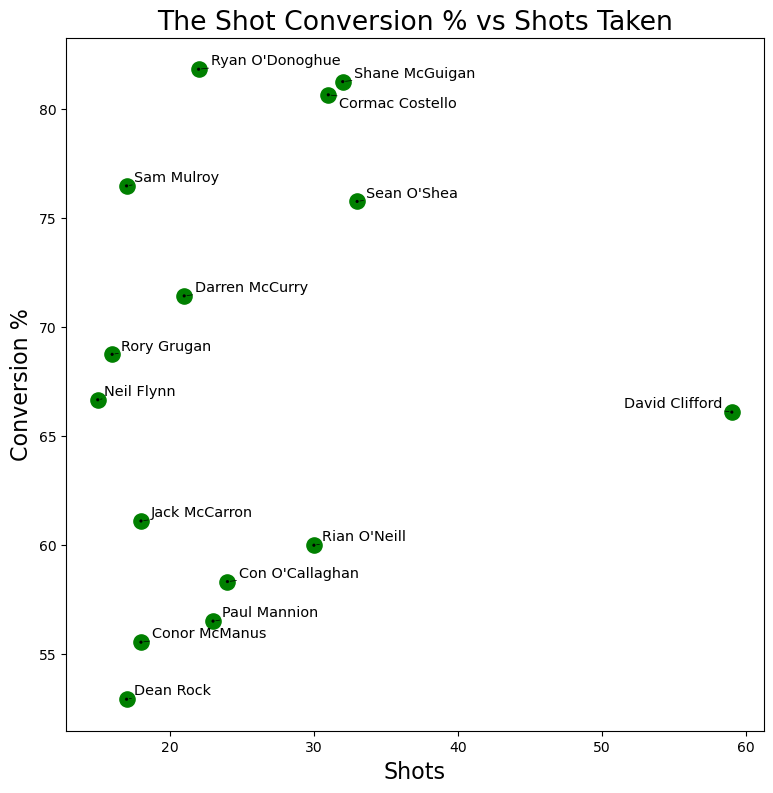

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Assuming you have a DataFrame called eff with columns 'Name', 'Perc', and 'Score'

plt.figure(figsize=(9, 9))  # Set the size of the figure

# Adjust the size and color of the scatter points
scatter = plt.scatter(eff['Score'], eff['Perc'], s=120, c='green') 
# Create a scatter plot

texts = []
for i, name in enumerate(eff['PlayerName']):
    x = eff['Score'].iloc[i]
    y = eff['Perc'].iloc[i]
    text = plt.text(x, y, name, ha='center', va='center', fontsize=8*1.3)  # Increase label font size by 30%
    texts.append(text)

# Set labels and title
plt.xlabel('Shots', fontsize=10*1.6)  # Increase axis label font size by 60%
plt.ylabel('Conversion %', fontsize=10*1.6)  # Increase axis label font size by 60%
plt.title('The Shot Conversion % vs Shots Taken', fontsize=12*1.6)  # Increase title font size by 60%

# Add arrows to the points
plt.quiver(eff['Score'], eff['Perc'], 0, 0, angles='xy', scale_units='xy', scale=1, width=0.005, color='black')

# Adjust the positions of labels to avoid overlap and increase spacing between points
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5), expand_points=(1.2, 1.2))

#plt.savefig('Dublin_shot_conversion.png', bbox_inches='tight')

# Display the plot
plt.show()

### Foot Analysis

In [18]:
# Group the data by 'Foot' and calculate the mean of 'Successful' column
foot = df.groupby('Foot')['Score'].mean() * 100
foot

Foot
hand     80.303030
left     55.730337
right    57.848837
Name: Score, dtype: float64

In [19]:
foot_count = df.groupby('Foot')['Score'].count()
foot_count

Foot
hand      66
left     445
right    688
Name: Score, dtype: int64

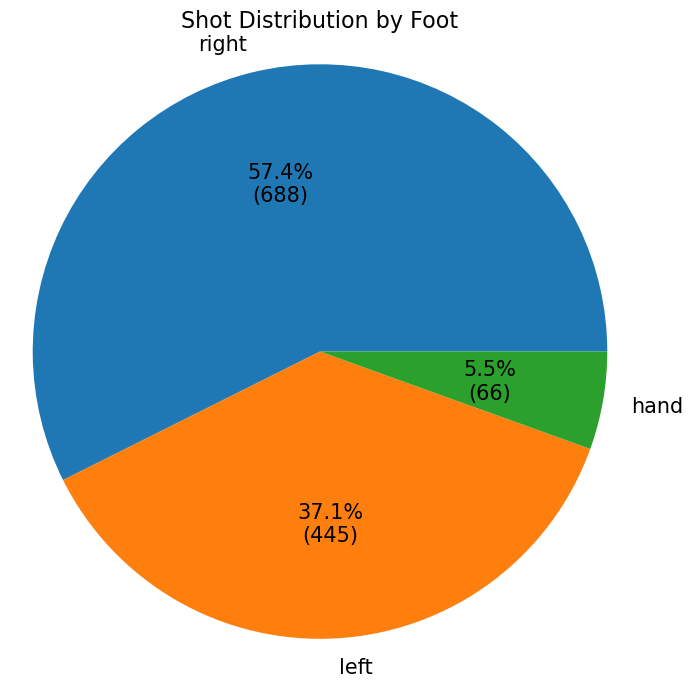

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with columns 'Foot' and 'Success'

# Group the data by 'Foot' and calculate the count and success rate
foot_counts = df['Foot'].value_counts()
foot_success_counts = df.groupby('Foot')['Score'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    foot_counts,
    labels=foot_counts.index,
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct / 100 * foot_counts.sum())})',
)

# Set the aspect ratio to make the pie chart circular
plt.axis('equal')

# Set the title of the pie chart
plt.title('Shot Distribution by Foot', fontsize=16)

# Increase the font size of all labels by 50%
for text in texts + autotexts:
    text.set_fontsize(text.get_fontsize() * 1.5)

# Adjust the position of the title to avoid overlapping with labels
plt.subplots_adjust(top=0.9)

#plt.savefig('Dublin_shot_distribution.png', bbox_inches='tight')

# Display the pie chart
plt.show()

In [21]:
import pandas as pd

# Calculate overall shot success rate and count per player
player_stats = df.groupby('PlayerName')['Score'].agg(['mean', 'count']).reset_index()
player_stats.columns = ['Player Name', 'Shot Success %', 'Shot Count']

# Calculate shot success rate and count per foot
foot_stats = df.groupby(['PlayerName', 'Foot'])['Score'].agg(['mean', 'count']).reset_index()
foot_stats = foot_stats.pivot(index='PlayerName', columns='Foot', values=['mean', 'count']).reset_index()
foot_stats.columns = ['Player Name', 'Shot Success Hand %', 'Shot Success Left %', 'Shot Success Right %', 'Shot Count Hand', 'Shot Count Left', 'Shot Count Right']

# Calculate shot success rate and count per pressure
pressure_stats = df.groupby(['PlayerName', 'Pressure'])['Score'].agg(['mean', 'count']).reset_index()
pressure_stats = pressure_stats.pivot(index='PlayerName', columns='Pressure', values=['mean', 'count']).reset_index()
pressure_stats.columns = ['Player Name', 'Shot Success No Pressure %', 'Shot Success Pressure %', 'Shot Count No Pressure', 'Shot Count Pressure']

# Merge foot_stats and pressure_stats using 'Player Name'
merged_stats = pd.merge(foot_stats, pressure_stats, on='Player Name', how='outer')

# Merge merged_stats with player_stats using 'Player Name'
stats = pd.merge(player_stats, merged_stats, on='Player Name', how='outer')

# Set cell format function
def format_cell(value, count):
    if np.isnan(count):
        return f'{value*100:.0f}%'
    else:
        return f'{value*100:.0f}% ({int(count)})'

# Modify cell values for player stats
stats['Shot Success %'] = stats.apply(lambda row: format_cell(row['Shot Success %'], int(row['Shot Count'])), axis=1)
stats['Shot Success Left %'] = stats.apply(lambda row: format_cell(row['Shot Success Left %'], row['Shot Count Left']), axis=1)
stats['Shot Success Right %'] = stats.apply(lambda row: format_cell(row['Shot Success Right %'], row['Shot Count Right']), axis=1)
stats['Shot Success Hand %'] = stats.apply(lambda row: format_cell(row['Shot Success Hand %'], row['Shot Count Hand']), axis=1)
stats['Shot Success No Pressure %'] = stats.apply(lambda row: format_cell(row['Shot Success No Pressure %'], row['Shot Count No Pressure']), axis=1)
stats['Shot Success Pressure %'] = stats.apply(lambda row: format_cell(row['Shot Success Pressure %'], row['Shot Count Pressure']), axis=1)

# Sort the table by 'Shot Success %' column in descending order
stats = stats.sort_values('Shot Success %', ascending=False, na_position='last')  # Set na_position='last'

# Reset the index
stats = stats.reset_index(drop=True)

# Drop unnecessary columns
stats = stats.drop(columns=['Shot Count Hand', 'Shot Count Left', 'Shot Count Right', 'Shot Count No Pressure', 'Shot Count Pressure'])

# Set 'Player Name' as the index
stats = stats.set_index('Player Name')

# Sort the table by 'Shot Success %' column in descending order
stats = stats.sort_values('Shot Count', ascending=False, na_position='last')  # Set na_position='last'
stats = stats.replace('nan%', '0')
# Output the table as a DataFrame



In [22]:
first_column = stats.pop('Shot Count')
  
# insert column using insert(position,column_name,
# first_column) function
stats.insert(0, 'Shot Count', first_column)

In [23]:
stats = stats.rename(columns={"Shot Success %": "Conversion%", "Shot Success Hand %": "Fisted Point %", 
                      "Shot Success Left %": "Left Foot%", "Shot Success Right %": "Right Foot%", 
                      "Shot Success No Pressure %": "Conversion% (No Pressure)",
                      "Shot Success Pressure %": "Conversion% (Pressure)",})

In [24]:
stats.head(30)

,Shot Count,Conversion%,Fisted Point %,Left Foot%,Right Foot%,Conversion% (No Pressure),Conversion% (Pressure)
Player Name,,,,,,,
David Clifford,59,66% (59),0,70% (50),44% (9),81% (27),53% (32)
Sean O'Shea,33,76% (33),100% (1),50% (2),77% (30),68% (25),100% (8)
Shane McGuigan,32,81% (32),100% (1),80% (30),100% (1),80% (25),86% (7)
Cormac Costello,31,81% (31),0,67% (6),84% (25),83% (24),71% (7)
Rian O'Neill,30,60% (30),0,100% (1),59% (29),68% (25),20% (5)
Con O'Callaghan,24,58% (24),80% (5),40% (10),67% (9),70% (10),50% (14)
Paul Mannion,23,57% (23),100% (1),53% (19),67% (3),73% (11),42% (12)
Ryan O'Donoghue,22,82% (22),100% (1),50% (2),84% (19),89% (18),50% (4)
Darren McCurry,21,71% (21),100% (1),72% (18),50% (2),80% (15),50% (6)


# Distance

In [25]:
dist = df.groupby(['PlayerName']).mean()
dist = dist[['Shot_Distance']]
dist

,Shot_Distance
PlayerName,
Aaron Masterson,43.800000
Adrian Spillane,30.657500
Aidan Forker,40.410000
Aidan Nugent,33.150000
Aidan O'Shea,30.328462
Alex Beirne,34.446000
Andrew Murnin,26.992000
Andrew Murning,26.200000
Ben McCormack,32.683750


In [26]:
table = stats.join(dist)

In [27]:
table
table = table.rename(columns={"Shot_Distance": "Avg Shot Distance"})

In [28]:
table

,Shot Count,Conversion%,Fisted Point %,Left Foot%,Right Foot%,Conversion% (No Pressure),Conversion% (Pressure),Avg Shot Distance
Player Name,,,,,,,,
David Clifford,59,66% (59),0,70% (50),44% (9),81% (27),53% (32),29.389661
Sean O'Shea,33,76% (33),100% (1),50% (2),77% (30),68% (25),100% (8),31.687879
Shane McGuigan,32,81% (32),100% (1),80% (30),100% (1),80% (25),86% (7),28.501562
Cormac Costello,31,81% (31),0,67% (6),84% (25),83% (24),71% (7),33.226452
Rian O'Neill,30,60% (30),0,100% (1),59% (29),68% (25),20% (5),36.761667
Con O'Callaghan,24,58% (24),80% (5),40% (10),67% (9),70% (10),50% (14),22.635833
Paul Mannion,23,57% (23),100% (1),53% (19),67% (3),73% (11),42% (12),31.551304
Ryan O'Donoghue,22,82% (22),100% (1),50% (2),84% (19),89% (18),50% (4),27.213182
Darren McCurry,21,71% (21),100% (1),72% (18),50% (2),80% (15),50% (6),33.547619


# Score Grid

In [29]:
pd.set_option('display.max_rows', 5000)

In [30]:
df.head()

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Perc
0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,33.333333
1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,80.000000
2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,33.333333
3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,100.000000
4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,100.000000


In [31]:
x = df.stand_x
y = df.stand_y
value = df.Score
#bins = (np.arange(6), np.arange(6))
#bins = ([0, 20, 40, 60, 80, 100, 120, 144], [0, 20, 40, 60, 88])
cats = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120',  '120-130', '130-140', '140-145']
#bins = ([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 145], [0, 15,  30, 45, 60, 75, 89])
bins = ([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 145], [0, 10, 20, 30, 40, 50, 60, 70, 80, 89])
#bins = (np.arange(0, 5.0001, 2.5), np.arange(0, 5.0001, 2.5))
sums, _, _ = np.histogram2d(x, y, bins=bins, weights=value)
counts, _, _ = np.histogram2d(x, y, bins=bins)
with  np.errstate(divide='ignore', invalid='ignore'):  # divide 0 by 0 results in NaN
    means = (sums / counts) 

test = pd.DataFrame(means)

test = test.T

test = test*100

In [32]:
def draw_map1():
  #  data = data[(data['Action'] == "point") | (data['Action'] == "short") & (data['Player_Name'] == player_name)]
    #data = data[(data['Player_Name'] == player_name)]
 #   good_pass = data[(data['Action'].str.contains("good")) & (data['Player_Name'] == player_name)]
  #  bad_pass = data[(data['Action'].str.contains("bad")) & (data['Player_Name'] == player_name)]
    #action_data = data[(data['Player_Name']==player_name)]
   # fig, ax = plt.subplots()
    fig=plt.figure()
    fig.set_size_inches(28, 16)
    ax=fig.add_subplot(1,1,1)
    


#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="grey")
    plt.plot([0,145],[88,88], color="grey")
    plt.plot([145,145],[88,0], color="grey")
    plt.plot([145,0],[0,0], color="grey")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="grey")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="grey")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="grey")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="grey")
    
            #large rectangle
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="grey",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="grey",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="grey")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="grey")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="grey")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="grey")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="grey")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="grey")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="grey")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="grey")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="grey")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="grey")
    
   # ly921 = [124,30] 
 #   lx921 = [0,30]
  #  plt.plot(lx921,color="grey")
    

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90, color="grey")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="grey")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    M = 9
    N = 15
    data = test
# sns.heatmap(data)
    c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.7, cmap=plt.cm.get_cmap('RdYlGn', 10))
             # cmap=sns.color_palette("rocket", as_cmap=True))
    #cbplt.colorbar(orientation = 'horizontal', pad=0.1, shrink=1, aspect=20)
    fig.colorbar(c, ax=ax, orientation = 'vertical')
   
    def show_values(pc, fmt="%.0f%%", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.05):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % (value), ha="right", va="center", color="black", size=25, **kw)

  # Replace this with the actual total count of your data
    show_values(c)
    


    #M = 10
    #N = 10
   # data = df2
# sns.heatmap(data)
  #  c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
 #   fig.colorbar(c, ax=ax)
#Tidy Axes
    plt.axis('off')

    
    #fig, ax = plt.subplots()
# the size of A4 paper
    
   # M = 1
   # N = 7
   # data = div
# sns.heatmap(data)
   # c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
   # fig.colorbar(c, ax=ax)
  #  sns.heatmap(div)
    #fig.set_size_inches(11.7, 8.27)
    #sns.kdeplot(data["x1"],data["y1"], shade=True, n_levels=50)
    #sns.set(rc={'figure.figsize':(11.7,8.27)})
   # plt.ylim(0, 88)
    #plt.xlim(0, 145)

    
    ax.set_title('Attacking >>>>>>>', fontsize = 30)

    plt.xlim(40, 145)
    
    #Display Pitch
    plt.show()
    
    #fig.savefig('kerry_possession_success_vgalway.pdf')


/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_21655/72768333.py:118: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.7, cmap=plt.cm.get_cmap('RdYlGn', 10))


TypeError: Only length-1 arrays can be converted to Python scalars

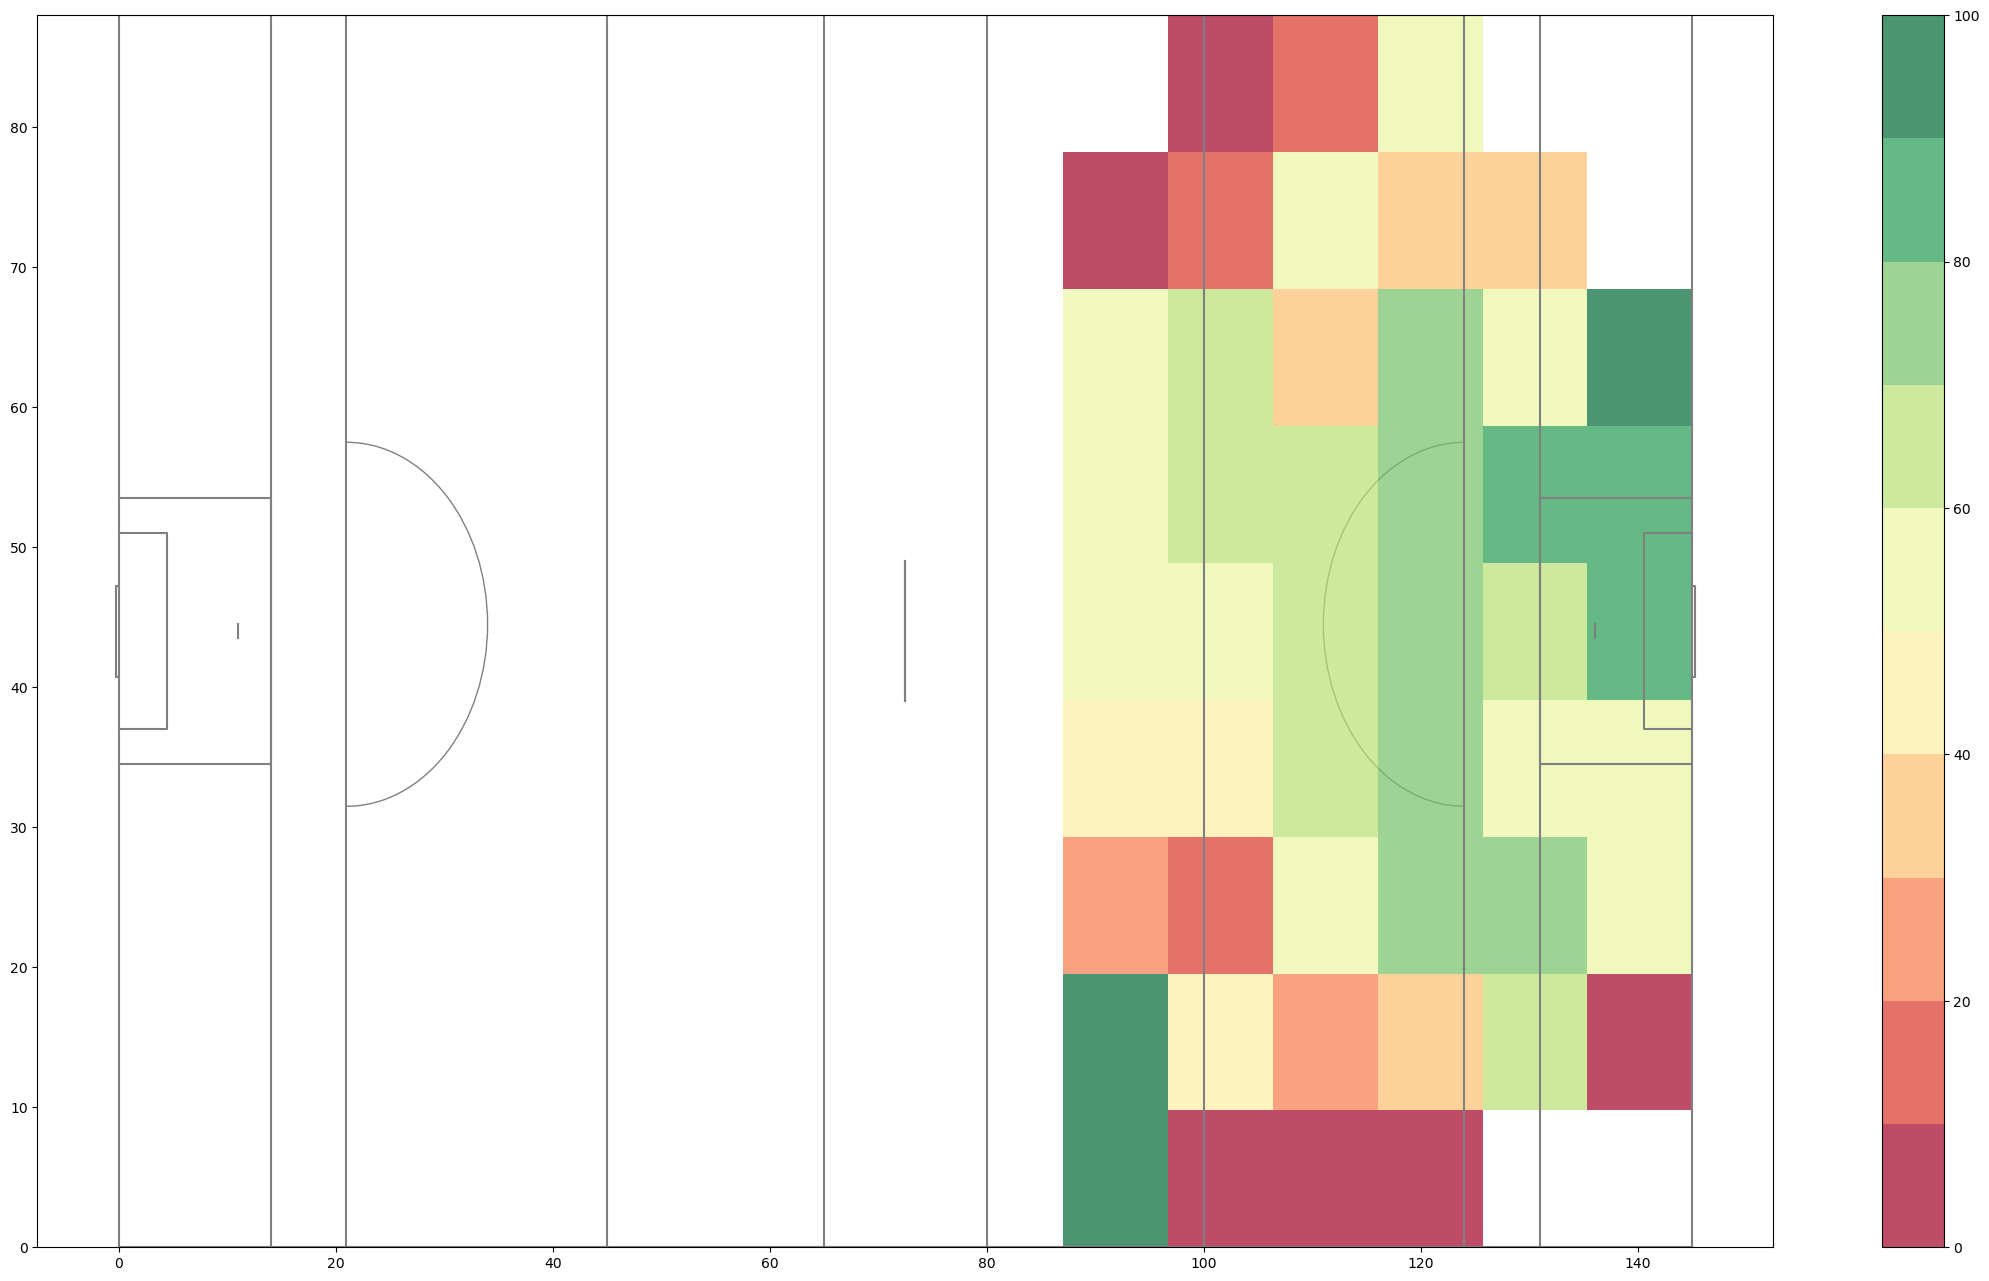

In [33]:
draw_map1()

### Shots per area

In [34]:
df.head()

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Perc
0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,33.333333
1,48,2023-05-07,Connaught Final,Sligo,Galway,1st,3,free,Score,Sean Carrabine,11,forward,left,n,34.85,14.972200,75.464773,130.027800,12.535227,1,80.000000
2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,33.333333
3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,100.000000
4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,100.000000


In [35]:
x = df.stand_x
y = df.stand_y
value = df.Score
#bins = (np.arange(6), np.arange(6))
#bins = ([0, 20, 40, 60, 80, 100, 120, 144], [0, 20, 40, 60, 88])
cats = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120',  '120-130', '130-140', '140-145']
#bins = ([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 145], [0, 15,  30, 45, 60, 75, 89])
bins = ([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 145], [0, 10, 20, 30, 40, 50, 60, 70, 80, 89])
#bins = (np.arange(0, 5.0001, 2.5), np.arange(0, 5.0001, 2.5))
sums, _, _ = np.histogram2d(x, y, bins=bins, weights=value)
counts, _, _ = np.histogram2d(x, y, bins=bins)
with  np.errstate(divide='ignore', invalid='ignore'):  # divide 0 by 0 results in NaN
    means = (sums / counts) 

test2 = pd.DataFrame(counts)

test2 = test2.T



test2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,3.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,24.0,31.0,9.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,18.0,72.0,66.0,26.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,56.0,52.0,30.0,55.0,22.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,36.0,44.0,36.0,63.0,10.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,43.0,53.0,35.0,41.0,15.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,35.0,66.0,70.0,37.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,26.0,21.0,3.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,2.0,0.0,0.0


In [36]:
def draw_map2():
  #  data = data[(data['Action'] == "point") | (data['Action'] == "short") & (data['Player_Name'] == player_name)]
    #data = data[(data['Player_Name'] == player_name)]
 #   good_pass = data[(data['Action'].str.contains("good")) & (data['Player_Name'] == player_name)]
  #  bad_pass = data[(data['Action'].str.contains("bad")) & (data['Player_Name'] == player_name)]
    #action_data = data[(data['Player_Name']==player_name)]
   # fig, ax = plt.subplots()
    fig=plt.figure()
    fig.set_size_inches(20, 20)
    ax=fig.add_subplot(1,1,1)
    


#Pitch Outline & Centre Line
    plt.plot([0,0],[0,88], color="grey")
    plt.plot([0,145],[88,88], color="grey")
    plt.plot([145,145],[88,0], color="grey")
    plt.plot([145,0],[0,0], color="grey")

    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")

            #goals#
    ly4 = [40.75,40.75,47.25,47.25]
    lx4 = [145,145.2,145.2,145]
    plt.plot(lx4,ly4,color="grey")

    ly5 = [40.75,40.75,47.25,47.25]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color="grey")

           #6 yard boxes#
    ly6 = [37,37,51,51]
    lx6 = [145,140.5,140.5,145]
    plt.plot(lx6,ly6,color="grey")

    ly7 = [37,37,51,51]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color="grey")
    
            #large rectangle
    ly88 = [34.5,34.5,53.5,53.5]
    lx88 = [145,131,131,145]
    plt.plot(lx88,ly88,color="grey",zorder=5)

    ly87 = [34.5,34.5,53.5,53.5]
    lx87 = [0,14,14,0]
    plt.plot(lx87,ly87,color="grey",zorder=5)
        
        #halfway small line
    ly97 = [39,49] 
    lx97 = [72.5,72.5]
    plt.plot(lx97,ly97,color="grey")
        
        #peno lines
    ly90 = [43.5,44.5] 
    lx90 = [11,11]
    plt.plot(lx90,ly90,color="grey")
        
    ly89 = [43.5,44.5] 
    lx89 = [136,136]
    plt.plot(lx89,ly89,color="grey")
        
        #14 yard line across the pitch
    ly94 = [0,88] 
    lx94 = [14,14]
    plt.plot(lx94,ly94,color="grey")
        
    ly99 = [0,88] 
    lx99 = [131,131]
    plt.plot(lx99,ly99,color="grey")
       
    #21 yard line
    ly98 = [0,88] 
    lx98 = [124,124]
    plt.plot(lx98,ly98,color="grey")
        
    ly93 = [0,88] 
    lx93 = [21,21]
    plt.plot(lx93,ly93,color="grey")
     
    #45 metre line
    ly96 = [0,88] 
    lx96 = [100,100]
    plt.plot(lx96,ly96,color="grey")
        
    ly91 = [0,88] 
    lx91 = [45,45]
    plt.plot(lx91,ly91,color="grey")
        
     #65 yard line
    ly95 = [0,88] 
    lx95 = [80,80]
    plt.plot(lx95,ly95,color="grey")
        
    ly92 = [0,88] 
    lx92 = [65,65]
    plt.plot(lx92,ly92,color="grey")
    
   # ly921 = [124,30] 
 #   lx921 = [0,30]
  #  plt.plot(lx921,color="grey")
    

#Prepare Arcs
    leftArc = Arc((21,44.5),height=26,width=26,angle=0,theta1=270,theta2=90, color="grey")
    rightArc = Arc((124,44.5),height=26,width=26,angle=0,theta1=90,theta2=270,color="grey")

#Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    M = 9
    N = 15
    data = test2
# sns.heatmap(data)
    c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.6, cmap=plt.cm.get_cmap('RdYlGn', 10))
             # cmap=sns.color_palette("rocket", as_cmap=True))
    #cbplt.colorbar(orientation = 'horizontal', pad=0.1, shrink=1, aspect=20)
    fig.colorbar(c, ax=ax, orientation = 'vertical')
   
    def show_values(pc, **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.05):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, str(int(value)), ha="right", va="center", color="black", size=25, **kw)

  # Replace this with the actual total count of your data
    show_values(c)
    


    #M = 10
    #N = 10
   # data = df2
# sns.heatmap(data)
  #  c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
 #   fig.colorbar(c, ax=ax)
#Tidy Axes
    plt.axis('off')

    
    #fig, ax = plt.subplots()
# the size of A4 paper
    
   # M = 1
   # N = 7
   # data = div
# sns.heatmap(data)
   # c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.4, cmap=plt.cm.get_cmap('Reds'))
             # cmap=sns.color_palette("rocket", as_cmap=True))
   # fig.colorbar(c, ax=ax)
  #  sns.heatmap(div)
    #fig.set_size_inches(11.7, 8.27)
    #sns.kdeplot(data["x1"],data["y1"], shade=True, n_levels=50)
    #sns.set(rc={'figure.figsize':(11.7,8.27)})
   # plt.ylim(0, 88)
    #plt.xlim(0, 145)

    
    ax.set_title('Attacking >>>>>>>', fontsize = 30)

    plt.xlim(40, 145)
    
    #Display Pitch
    plt.show()
    
    #fig.savefig('kerry_possession_success_vgalway.pdf')


/var/folders/tk/5kkk520d1jj3xftb0hg9y9fw0000gn/T/ipykernel_21655/2350581790.py:118: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c = ax.pcolormesh(np.linspace(0, 145, N+1), np.linspace(0, 88, M+1), data, alpha=0.6, cmap=plt.cm.get_cmap('RdYlGn', 10))


TypeError: Only length-1 arrays can be converted to Python scalars

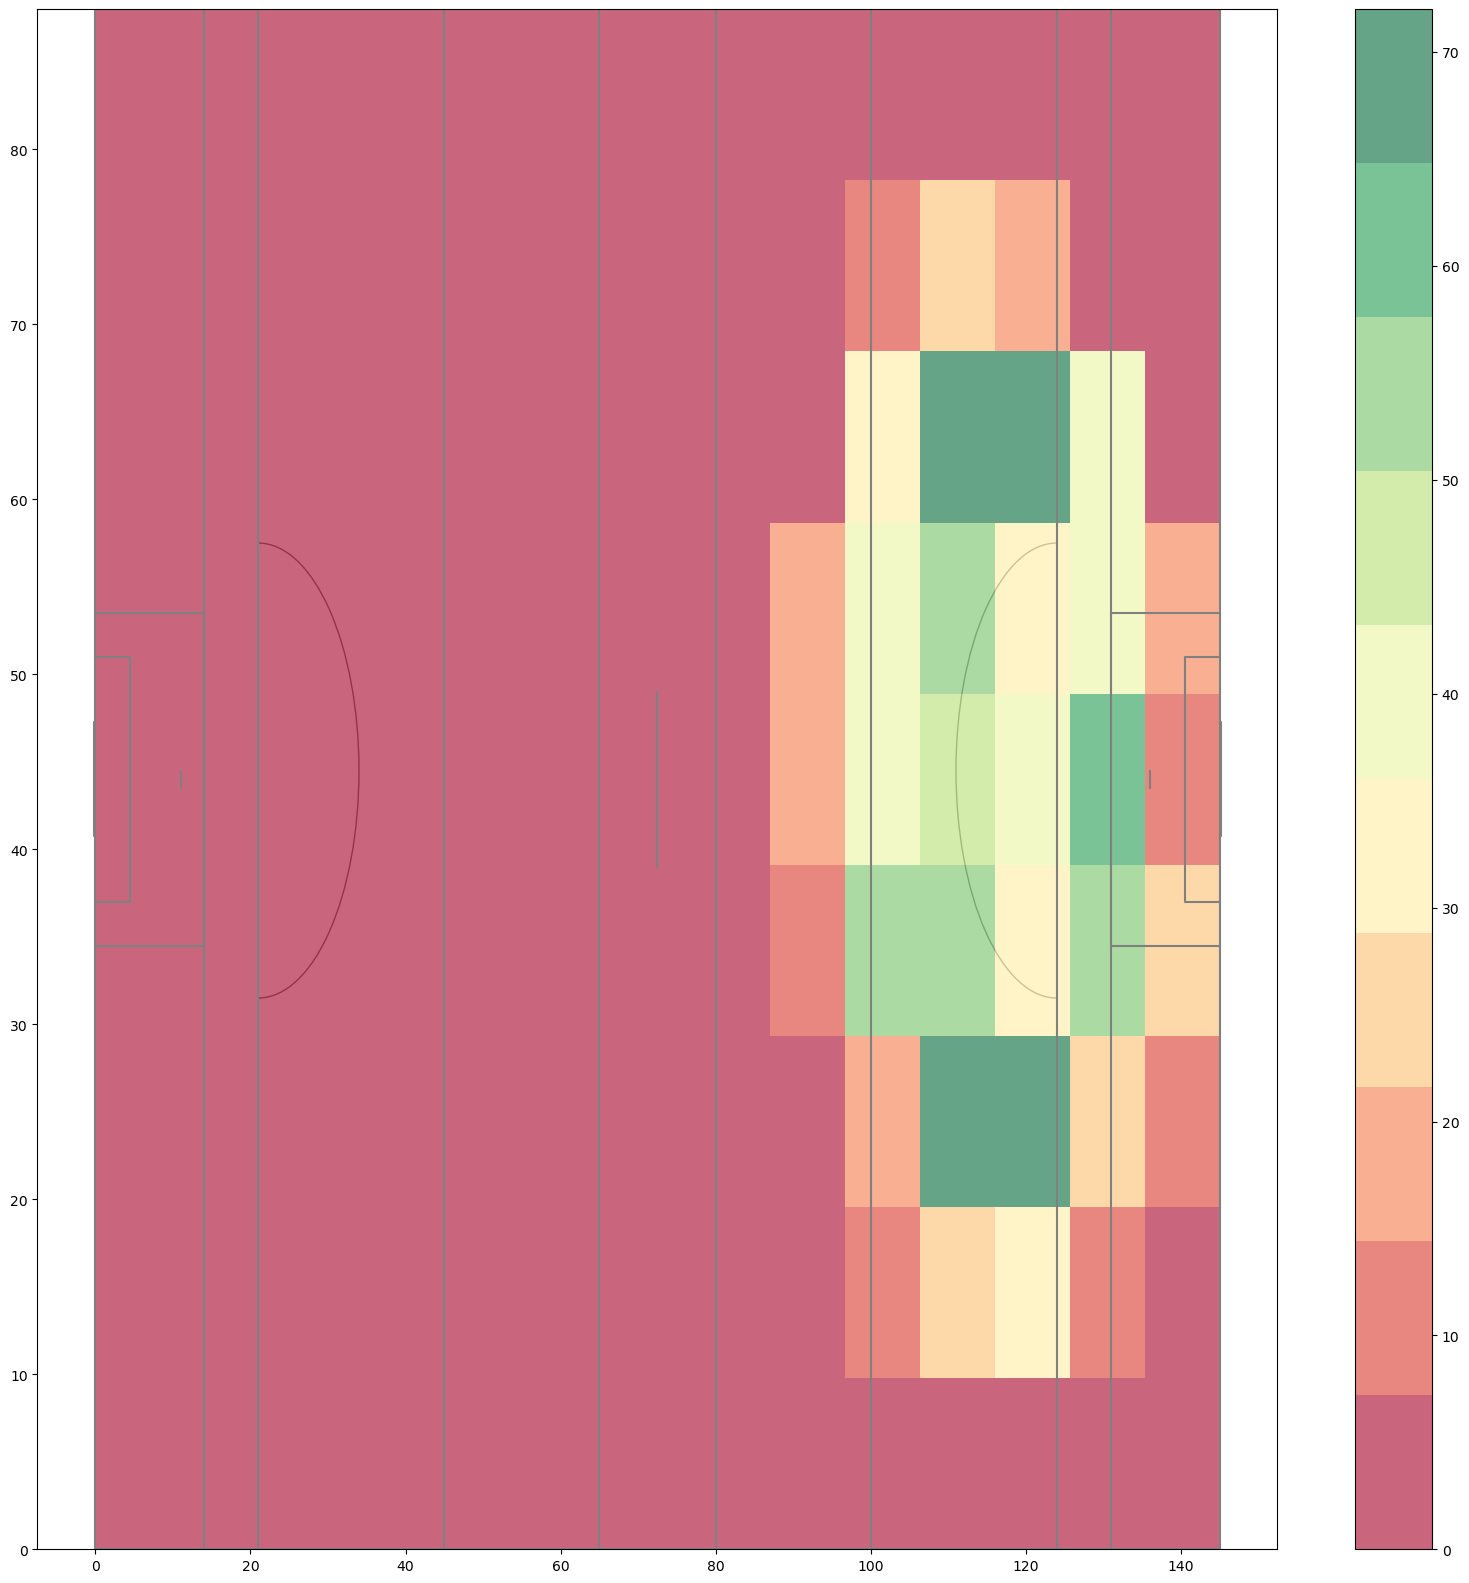

In [37]:
draw_map2()

## Pressure

### remove placed balls

In [38]:
df['Placed_Ball'] = np.where((df['Action'] == 'point') | (df['Action'] == 'blocked')
                             | (df['Action'] == 'post') | (df['Action'] == 'short')
                             | (df['Action'] == 'wide'), 0, 1)


In [39]:
df1 = df[df['Placed_Ball'] == 0]

In [40]:
df1

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Perc,Placed_Ball
0,47,2023-05-07,Connaught Final,Sligo,Galway,1st,1,point,Score,Pat Spillane,13,forward,right,n,41.83,36.958727,63.599366,108.041273,24.400634,1,33.333333,0
2,49,2023-05-07,Connaught Final,Galway,Sligo,1st,4,point,Score,Dylan McHugh,5,back,hand,n,15.03,136.421588,56.338445,136.421588,56.338445,1,33.333333,0
3,50,2023-05-07,Connaught Final,Sligo,Galway,1st,5,point,Score,Darragh Cummins,18,forward,right,n,39.95,37.656712,30.659578,107.343288,57.340422,1,100.000000,0
4,51,2023-05-07,Connaught Final,Galway,Sligo,1st,7,point,Score,Ian burke,13,forward,left,y,30.77,130.314219,71.037382,130.314219,71.037382,1,100.000000,0
6,53,2023-05-07,Connaught Final,Sligo,Galway,1st,11,wide,Miss,Pat Spillane,13,forward,right,y,38.48,29.629885,68.558043,115.370115,19.441957,0,33.333333,0
7,55,2023-05-07,Connaught Final,Sligo,Galway,1st,13,wide,Miss,Brian Cox,5,back,right,y,38.92,38.180201,51.556863,106.819799,36.443137,0,0.000000,0
8,54,2023-05-07,Connaught Final,Galway,Sligo,1st,13,point,Score,Cillian McDaid,7,back,hand,y,9.09,142.703452,52.796532,142.703452,52.796532,1,60.000000,0
10,57,2023-05-07,Connaught Final,Galway,Sligo,1st,17,point,Score,Matthew Tierney,10,forward,hand,n,11.99,139.562520,33.316012,139.562520,33.316012,1,90.909091,0
11,58,2023-05-07,Connaught Final,Sligo,Galway,1st,21,blocked,Miss,Pat Spillane,13,forward,left,y,23.42,7.992350,21.981892,137.007650,66.018108,0,33.333333,0
15,62,2023-05-07,Connaught Final,Sligo,Galway,1st,29,wide,Miss,Sean Carrabine,11,forward,left,y,42.21,42.193615,42.702081,102.806385,45.297919,0,80.000000,0


In [41]:
pr = df1.groupby(['TeamName', 'Pressure']).mean()
pr = pr.reset_index()
pr = pr[['TeamName', 'Pressure', 'Score']]

In [42]:
pr

,TeamName,Pressure,Score
0,Armagh,n,0.514286
1,Armagh,y,0.424242
2,Clare,n,0.300000
3,Clare,y,0.444444
4,Cork,n,0.541667
5,Cork,y,0.464286
6,Derry,n,0.400000
7,Derry,y,0.558140
8,Donegal,n,0.777778
9,Donegal,y,0.600000


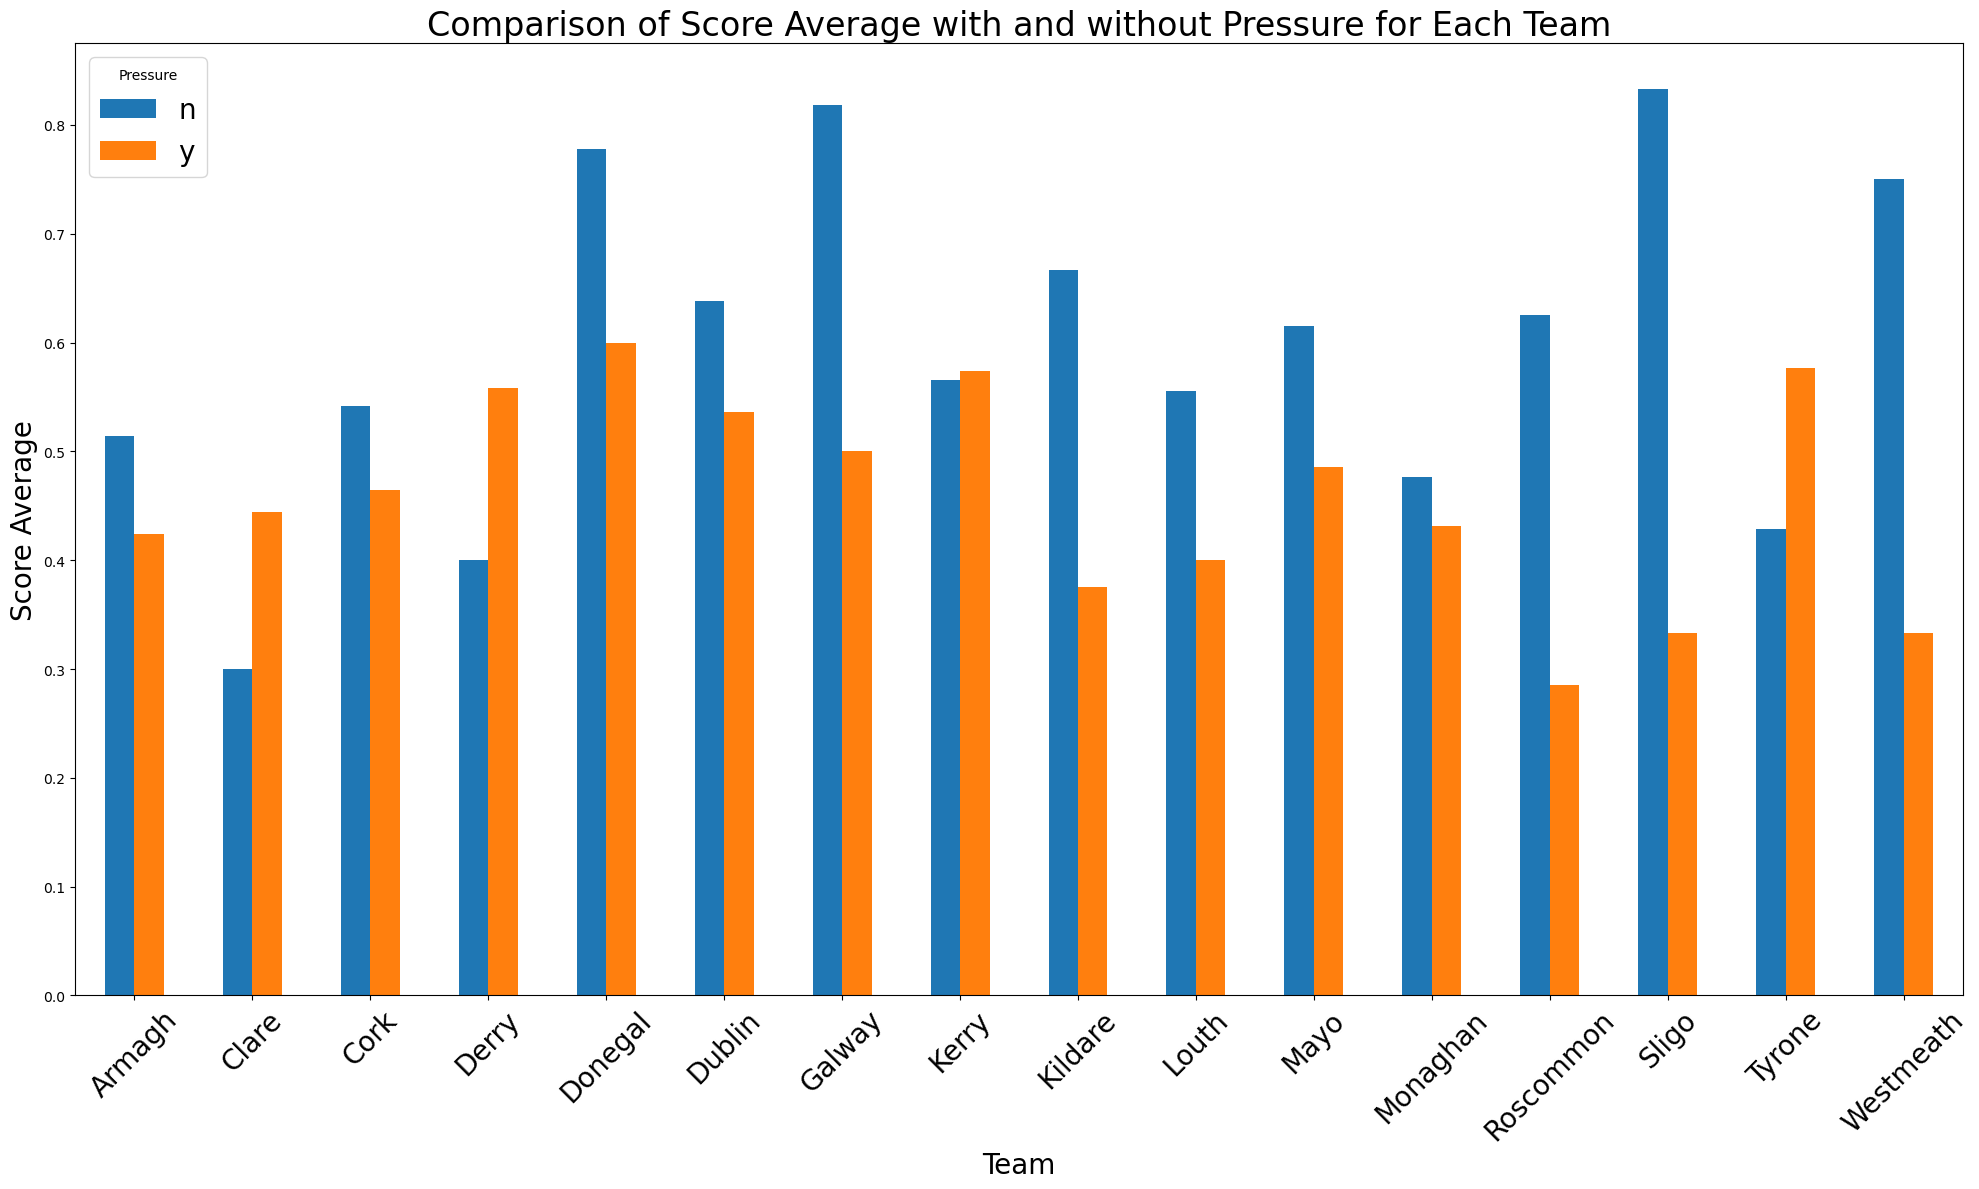

In [43]:
# Group by TeamName and Pressure, calculate the mean ScoreAverage
grouped = pr.groupby(['TeamName', 'Pressure'])['Score'].mean().unstack()

# Plot
grouped.plot(kind='bar', figsize=(20, 12))
plt.title('Comparison of Score Average with and without Pressure for Each Team', size=24)
plt.xlabel('Team', size=20)
plt.ylabel('Score Average', size=20)
plt.xticks(rotation=45, size=20)
plt.legend(title='Pressure', loc='upper left', fontsize=20)
plt.tight_layout()
plt.show()

### Overall Pressure

In [44]:
pr1 = df1.groupby(['Pressure']).mean()
pr1 = pr1.reset_index()
pr1 = pr1[['Pressure', 'Score']]
pr1

,Pressure,Score
0,n,0.567123
1,y,0.489978


In [45]:
pr2 = df1.groupby(['Pressure']).count()
pr2 = pr2.reset_index()
pr2 = pr2[['Pressure', 'Score']]
pr2

,Pressure,Score
0,n,365
1,y,449


In [46]:
# Calculate the sum of counts
total_count = pr2['Score'].sum()

# Calculate the percentage for each pressure condition
pr2['Percentage'] = (pr2['Score'] / total_count) * 100

In [47]:
pr2

,Pressure,Score,Percentage
0,n,365,44.840295
1,y,449,55.159705


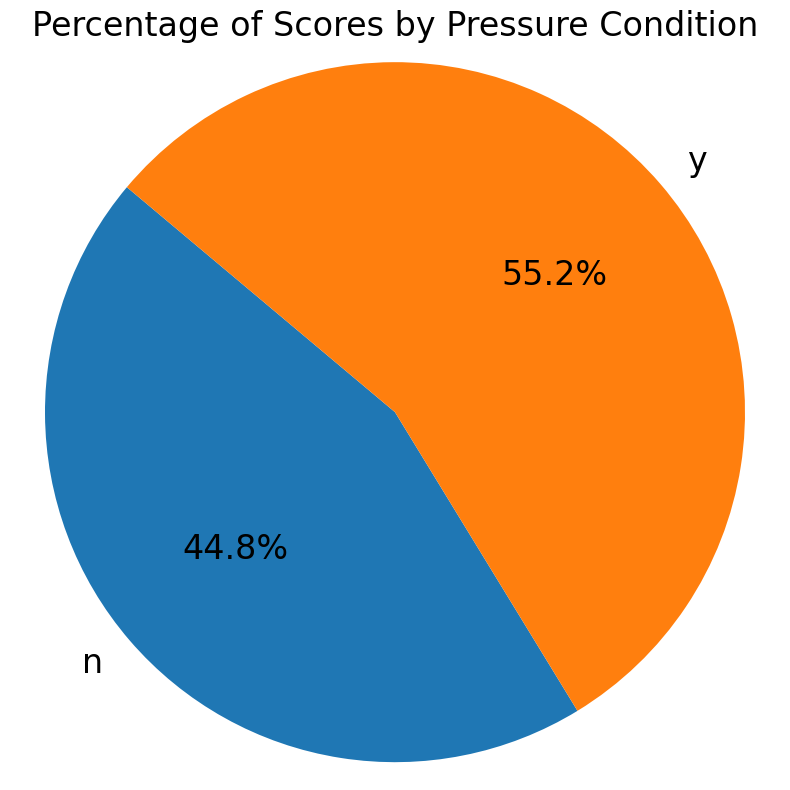

In [48]:
# Plotting the pie chart

plt.figure(figsize=(8, 8))
plt.pie(pr2['Percentage'], labels=pr2['Pressure'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 24})
plt.title('Percentage of Scores by Pressure Condition', fontsize=24)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjusting the size of the labels
plt.tight_layout()
plt.show()


## Pressure by Team

### Average score from shots per pressure

In [49]:
op = df1.groupby(['Opposition', 'Pressure']).count()
op = op.reset_index()
op = op[['Opposition', 'Pressure', 'Score']]
op

,Opposition,Pressure,Score
0,Armagh,n,32
1,Armagh,y,49
2,Clare,n,9
3,Clare,y,9
4,Cork,n,17
5,Cork,y,28
6,Derry,n,42
7,Derry,y,38
8,Donegal,n,10
9,Donegal,y,13


In [50]:
grouped = df1.groupby(['Opposition', 'Pressure'])['Score'].sum()

# Calculate the percentage for each pressure within each team
percentage = grouped.groupby(level=0).apply(lambda x: (x / x.sum()) * 100)

In [51]:
percentage

Opposition  Pressure
Armagh      n           24.324324
            y           75.675676
Clare       n           66.666667
            y           33.333333
Cork        n           36.000000
            y           64.000000
Derry       n           59.459459
            y           40.540541
Donegal     n           45.454545
            y           54.545455
Dublin      n           46.511628
            y           53.488372
Galway      n           57.142857
            y           42.857143
Kerry       n           50.000000
            y           50.000000
Kildare     n           50.000000
            y           50.000000
Louth       n           40.000000
            y           60.000000
Mayo        n           47.619048
            y           52.380952
Monaghan    n           47.727273
            y           52.272727
Roscommon   n           57.142857
            y           42.857143
Sligo       n           62.500000
            y           37.500000
Tyrone      n           60.

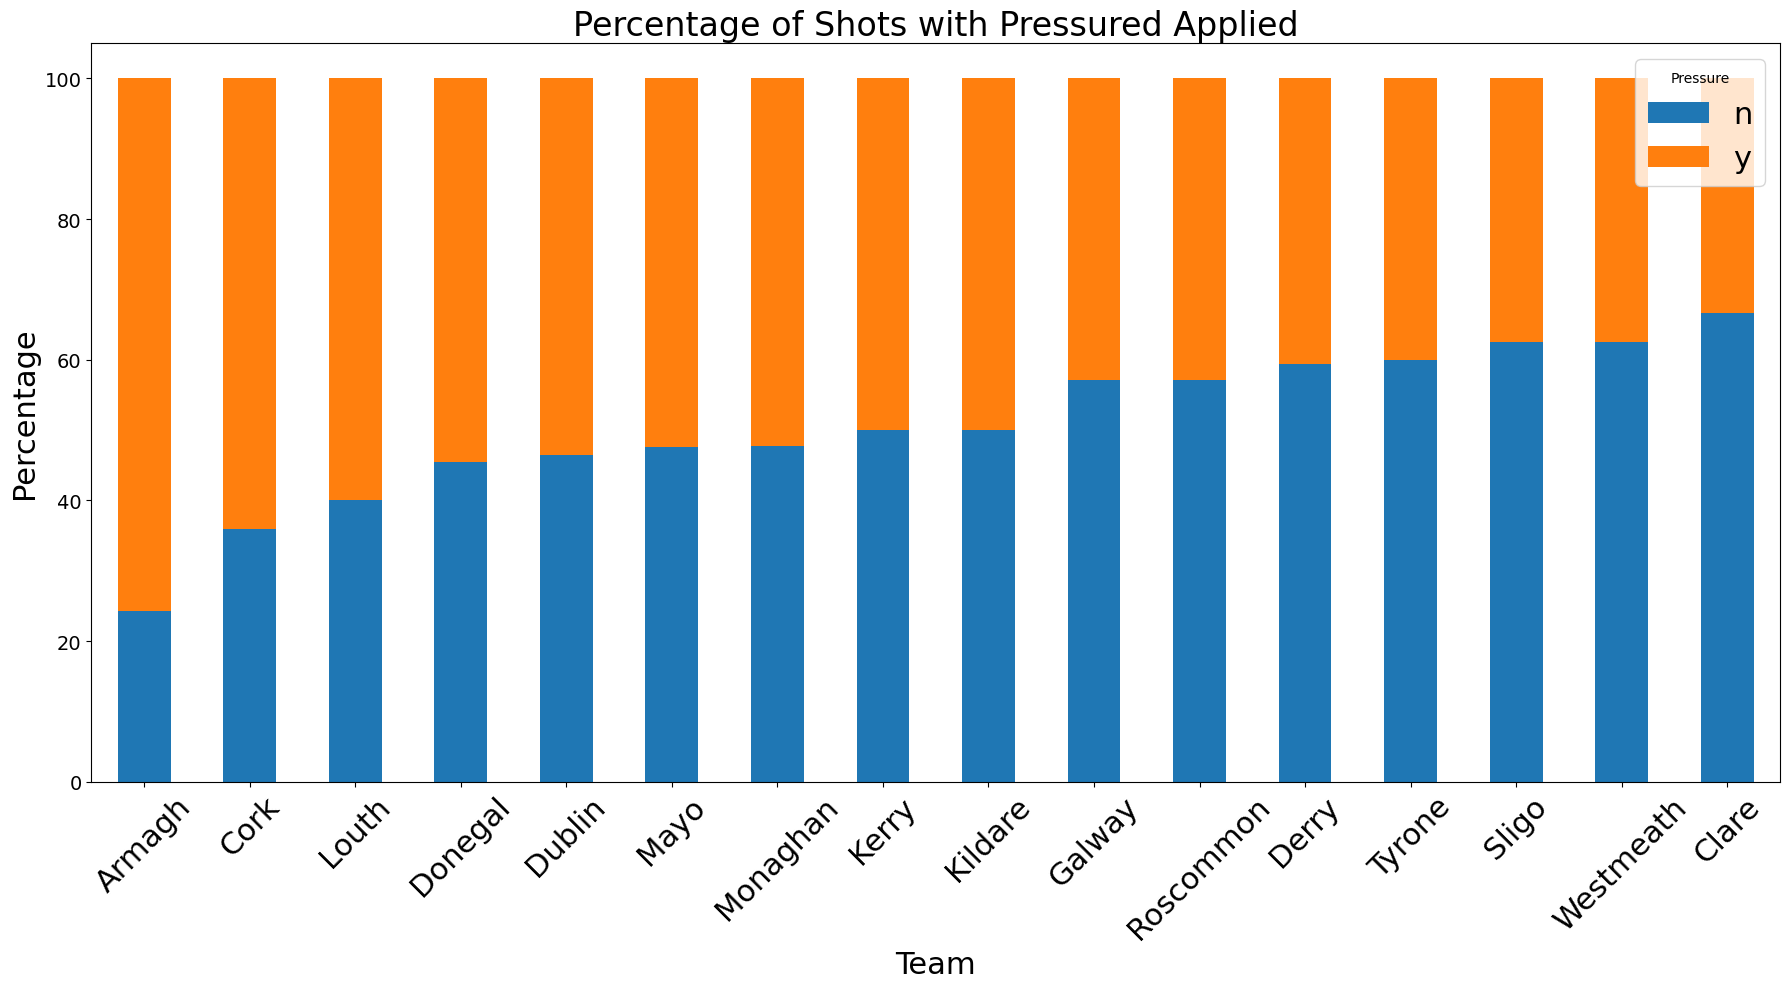

In [52]:
# Calculate the percentage for each pressure within each team
percentage = grouped.groupby(level=0).apply(lambda x: (x / x.sum()) * 100).unstack()

# Convert percentage to DataFrame
percentage_df = percentage.reset_index()

# Sort the DataFrame by the percentage of 'Yes' pressure in descending order
percentage_df.sort_values(by='y', ascending=False, inplace=True)

# Plotting the column chart
#plt.figure(figsize=(32, 18))  # Adjust figure size
#ax = percentage_df.plot(kind='bar', x='Opposition', stacked=True, fontsize=16) 

percentage_df.plot(kind='bar', x='Opposition', stacked=True, fontsize=16, figsize=(18, 10))
plt.title('Percentage of Shots with Pressured Applied', fontsize=24)  # Increase title font size
plt.xlabel('Team', fontsize=22)  # Increase x-axis label font size
plt.ylabel('Percentage', fontsize=22)  # Increase y-axis label font size
plt.xticks(rotation=45, fontsize=22)  # Increase x-axis tick font size and rotate
plt.yticks(fontsize=14)  # Increase y-axis tick font size
plt.legend(title='Pressure', loc='upper right', fontsize=22)  # Increase legend font size
plt.tight_layout()
plt.show()

### Breakdown of Shots

In [55]:
df.groupby('Action').count()

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Perc,Placed_Ball
Action,,,,,,,,,,,,,,,,,,,,,
blocked,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
fortyfive,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
fortyfive post,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
fortyfive short,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
fortyfive wide,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
free,196,196,196,195,195,196,196,196,195,196,196,196,196,196,196,196,196,196,196,195,196
free post,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
free short,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
free wide,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19


In [58]:
df.loc[df['Action'].str.contains('fortyfive', case=False, na=False), 'Shot_Type'] = 'fortyfive'
df.loc[df['Action'].str.contains('free', case=False, na=False), 'Shot_Type'] = 'free'
df.loc[df['Action'].str.contains('mark', case=False, na=False), 'Shot_Type'] = 'mark'
df.loc[df['Action'].str.contains('goal', case=False, na=False), 'Shot_Type'] = 'goal attempt'
df.loc[df['Action'].str.contains('short', case=False, na=False), 'Shot_Type'] = 'play'
df.loc[df['Action'].str.contains('wide', case=False, na=False), 'Shot_Type'] = 'play'
df.loc[df['Action'].str.contains('post', case=False, na=False), 'Shot_Type'] = 'play'
df.loc[df['Action'].str.contains('pen', case=False, na=False), 'Shot_Type'] = 'penalty'
df.loc[df['Action'].str.contains('blocked', case=False, na=False), 'Shot_Type'] = 'play'
df.loc[df['Action'].str.contains('point', case=False, na=False), 'Shot_Type'] = 'play'

In [59]:
df.groupby('Shot_Type').count()

,Unnamed: 0,Date,Game,TeamName,Opposition,Half,Minute,Action,Outcome,PlayerName,PlayerNumber,Position,Foot,Pressure,Shot_Distance,x,y,stand_x,stand_y,Score,Perc,Placed_Ball
Shot_Type,,,,,,,,,,,,,,,,,,,,,,
fortyfive,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
free,196,196,196,195,195,196,196,196,196,195,196,196,196,196,196,196,196,196,196,196,195,196
goal attempt,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73
mark,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
penalty,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
play,884,884,884,883,883,884,884,884,884,882,884,884,884,884,884,884,884,884,884,884,882,884


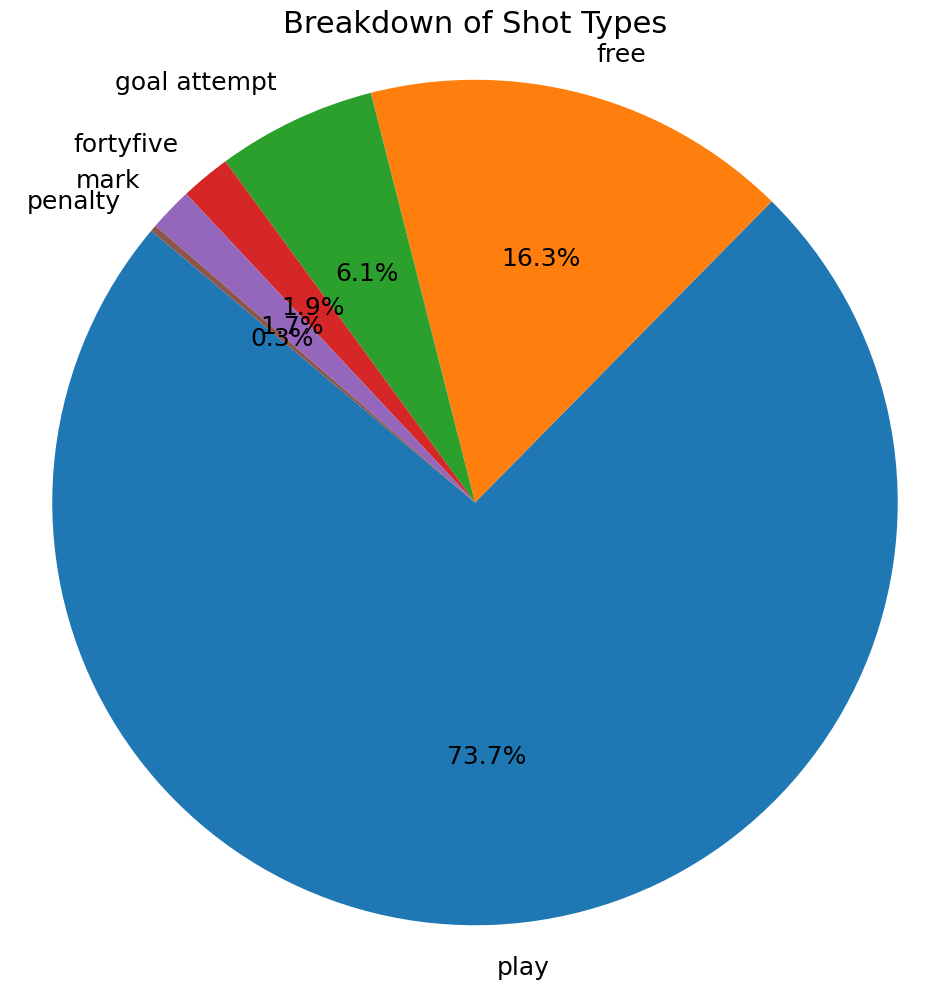

In [65]:


# Count the occurrences of each shot type
shot_type_counts = df['Shot_Type'].value_counts()

# Define font sizes
title_font_size = 22
label_font_size = 18
percentage_font_size = 18

# Plot the breakdown of shot types in a pie chart
plt.figure(figsize=(12, 12))
plt.pie(shot_type_counts, labels=shot_type_counts.index, autopct='%1.1f%%', startangle=140)

# Set title font size
plt.title('Breakdown of Shot Types', fontsize=title_font_size)

# Set font size for labels and percentage labels
plt.rcParams.update({'font.size': label_font_size})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


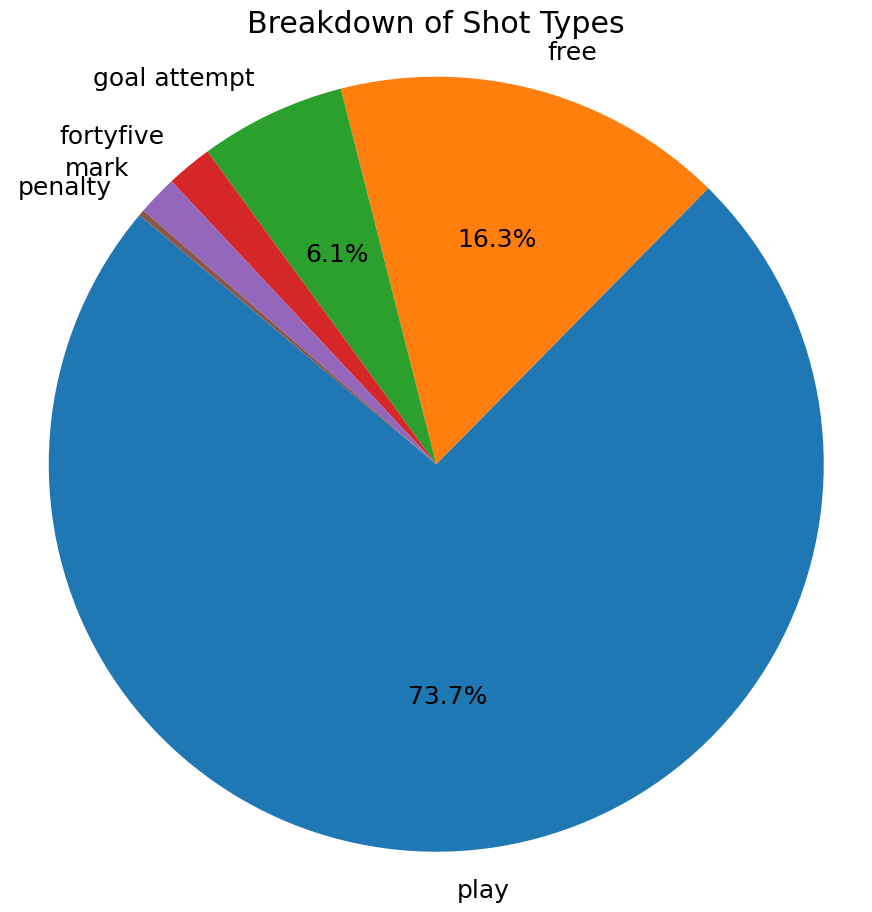

In [72]:

# Count the occurrences of each shot type
shot_type_counts = df['Shot_Type'].value_counts()

# Plot the breakdown of shot types in a pie chart
plt.figure(figsize=(11, 11))
plt.pie(shot_type_counts, labels=shot_type_counts.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '', startangle=140)
plt.title('Breakdown of Shot Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


### Percentage of scores per shot type

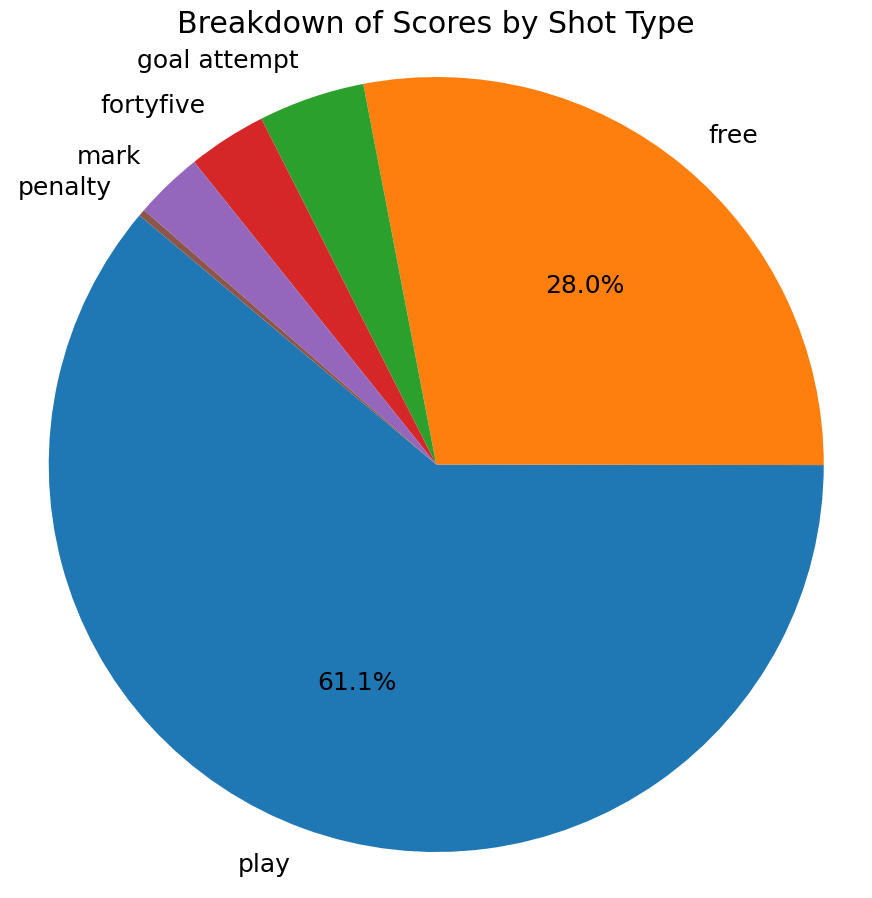

In [74]:
scores = df[df['Score'] == 1]
# Count the occurrences of each shot type
shot_type_counts = scores['Shot_Type'].value_counts()

# Plot the breakdown of shot types in a pie chart
plt.figure(figsize=(11, 11))
plt.pie(shot_type_counts, labels=shot_type_counts.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '', startangle=140)
plt.title('Breakdown of Scores by Shot Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()
